In [2]:
!pip install imbalanced-learn
!pip install pickle5

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement pickle5 (from versions: none)
ERROR: No matching distribution found for pickle5

[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder , OrdinalEncoder , LabelEncoder
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE

In [4]:
Train=pd.read_csv("Train-1542865627584.csv")
Train_Beneficiarydata=pd.read_csv("Train_Beneficiarydata-1542865627584.csv")
Train_Inpatientdata=pd.read_csv("Train_Inpatientdata-1542865627584.csv")
Train_Outpatientdata=pd.read_csv("Train_Outpatientdata-1542865627584.csv")

In [5]:
Train_Allpatientdata=pd.merge(Train_Outpatientdata,Train_Inpatientdata,
                              left_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
                              right_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode']
                              ,how='outer')
Train_Allpatientdata.to_csv('Train_Allpatientdata.csv', index=False)

In [6]:
Train_Allpatientdata=pd.merge(Train_Allpatientdata,Train_Beneficiarydata,on="BeneID")

In [7]:
Train_Allpatientdata=pd.merge(Train_Allpatientdata,Train,on="Provider")

In [8]:
Train_Allpatientdata.shape

(558211, 55)

In [9]:
Train_Allpatientdata.head(5)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE100000,CLM126832,2009-01-08,2009-01-08,PRV57172,50,PHY383401,NaN,NaN,79678,...,2,1,2,2,2,0,0,120,30,Yes
1,BENE100000,CLM351838,2009-05-10,2009-05-10,PRV57172,70,PHY370909,NaN,PHY363377,71656,...,2,1,2,2,2,0,0,120,30,Yes
2,BENE100001,CLM229075,2009-03-05,2009-03-05,PRV55158,70,PHY383478,NaN,NaN,64881,...,2,1,1,2,1,0,0,2530,540,No
3,BENE100001,CLM258631,2009-03-21,2009-03-21,PRV54966,70,PHY347511,NaN,NaN,36401,...,2,1,1,2,1,0,0,2530,540,Yes
4,BENE100001,CLM332544,2009-04-30,2009-05-02,PRV54890,90,PHY343317,PHY408367,PHY408367,2948,...,2,1,1,2,1,0,0,2530,540,No


In [10]:
Train_Allpatientdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 55 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   BeneID                           558211 non-null  object 
 1   ClaimID                          558211 non-null  object 
 2   ClaimStartDt                     558211 non-null  object 
 3   ClaimEndDt                       558211 non-null  object 
 4   Provider                         558211 non-null  object 
 5   InscClaimAmtReimbursed           558211 non-null  int64  
 6   AttendingPhysician               556703 non-null  object 
 7   OperatingPhysician               114447 non-null  object 
 8   OtherPhysician                   199736 non-null  object 
 9   ClmDiagnosisCode_1               547758 non-null  object 
 10  ClmDiagnosisCode_2               362605 non-null  object 
 11  ClmDiagnosisCode_3               243055 non-null  object 
 12  Cl

In [11]:
a=(Train_Allpatientdata["AttendingPhysician"]==Train_Allpatientdata["OperatingPhysician"])
b=(Train_Allpatientdata["OperatingPhysician"]==Train_Allpatientdata["OtherPhysician"])
c=(Train_Allpatientdata["AttendingPhysician"]==Train_Allpatientdata["OtherPhysician"])

print(a.sum())
print(b.sum())
print(c.sum())
print( (a+b).sum() ) # atten=oper=other

61164
15884
85258
63872


In [12]:
def physician_same(row):
    atten_oper=row["AttendingPhysician"]==row["OperatingPhysician"]
    oper_other=row["OperatingPhysician"]==row["OtherPhysician"]
    atten_other=row["AttendingPhysician"]==row["OtherPhysician"]
    if atten_oper==True and oper_other==True:# atten = oper = other
        return 0
    elif atten_oper==True and oper_other==False:# atten = oper != other
        return 1
    elif atten_oper==False and oper_other==True:# atten != oper = other
        return 2
    else:# atten != oper != other
        return 3
    
phy_same=Train_Allpatientdata.apply(physician_same,axis=1)


In [13]:
Train_Allpatientdata["phy_same"]=phy_same

In [14]:
def physician_count(row,list_count):
    count=0
    for col in list_count:
        if pd.isnull(row[col]):
            continue
        else:
            count+=1
    return count
    
list_count=["AttendingPhysician","OperatingPhysician","OtherPhysician"]
phy_count=Train_Allpatientdata.apply(physician_count,axis=1,args=(list_count,))


In [15]:
Train_Allpatientdata["phy_count"]=phy_count

In [16]:
Train_Allpatientdata.head(4)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,phy_same,phy_count
0,BENE100000,CLM126832,2009-01-08,2009-01-08,PRV57172,50,PHY383401,NaN,NaN,79678,...,2,2,2,0,0,120,30,Yes,3,1
1,BENE100000,CLM351838,2009-05-10,2009-05-10,PRV57172,70,PHY370909,NaN,PHY363377,71656,...,2,2,2,0,0,120,30,Yes,3,2
2,BENE100001,CLM229075,2009-03-05,2009-03-05,PRV55158,70,PHY383478,NaN,NaN,64881,...,1,2,1,0,0,2530,540,No,3,1
3,BENE100001,CLM258631,2009-03-21,2009-03-21,PRV54966,70,PHY347511,NaN,NaN,36401,...,1,2,1,0,0,2530,540,Yes,3,1


In [17]:
startdate= pd.to_datetime( Train_Allpatientdata["ClaimStartDt"] )
enddate= pd.to_datetime( Train_Allpatientdata["ClaimEndDt"] )

period = ( enddate - startdate).dt.days
Train_Allpatientdata["period"] = period

In [18]:
Train_Allpatientdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 58 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   BeneID                           558211 non-null  object 
 1   ClaimID                          558211 non-null  object 
 2   ClaimStartDt                     558211 non-null  object 
 3   ClaimEndDt                       558211 non-null  object 
 4   Provider                         558211 non-null  object 
 5   InscClaimAmtReimbursed           558211 non-null  int64  
 6   AttendingPhysician               556703 non-null  object 
 7   OperatingPhysician               114447 non-null  object 
 8   OtherPhysician                   199736 non-null  object 
 9   ClmDiagnosisCode_1               547758 non-null  object 
 10  ClmDiagnosisCode_2               362605 non-null  object 
 11  ClmDiagnosisCode_3               243055 non-null  object 
 12  Cl

In [19]:
## taking copy
copy1 = Train_Allpatientdata.copy()
copy1.to_csv('joined_dataset.csv', index=False)

# Add the new code for saving CSV and splitting the dataset here:

# Save the preprocessed dataset to a CSV file
copy1.to_csv('preprocessed_dataset.csv', index=False)

# Split the dataset into training and testing sets
train_ratio = 0.8  # You can adjust the ratio based on your preference
test_ratio = 1 - train_ratio

# Shuffle the data
copy1_shuffled = shuffle(copy1)

# Calculate the number of samples for training and testing
num_samples = len(copy1_shuffled)
num_train_samples = int(train_ratio * num_samples)

# Split the dataset
train_data = copy1_shuffled[:num_train_samples]
test_data = copy1_shuffled[num_train_samples:]

# Save the training and testing sets to separate CSV files
train_data.to_csv('train_dataset.csv', index=False)
test_data.to_csv('test_dataset.csv', index=False)


In [20]:
cronic_cols_names=copy1.columns[ copy1.columns.str.startswith("ChronicCond") ]
cronic_cols=copy1[   cronic_cols_names   ]
cronic=cronic_cols.replace({2:0})
copy1[   cronic_cols_names   ]=cronic

In [21]:
pd.set_option('future.no_silent_downcasting', True)
copy1["PotentialFraud"]=copy1["PotentialFraud"].replace({"Yes":1,"No":0})

In [22]:
copy1["Gender"]=copy1["Gender"].replace({2:0})

In [23]:
startadmt= pd.to_datetime( copy1["AdmissionDt"] )
enddatadmt= pd.to_datetime( copy1["DischargeDt"] )

periodadmt = ( enddatadmt - startadmt).dt.days
copy1["periodadmt"] = periodadmt
copy1["periodadmt"]=copy1["periodadmt"].fillna(0)

In [24]:
copy1["RenalDiseaseIndicator"]=copy1["RenalDiseaseIndicator"].replace({"Y":1})

In [25]:
birthdate=pd.to_datetime(copy1["DOB"])
enddate=pd.to_datetime(copy1["DOD"])

# cheack whether the patient dead or alife
def alife_function(value):
    if value==True:
        return 1
    else:
        return 0
alife = pd.isna(enddate).apply(alife_function)


# get the age of patient
max_date=enddate.dropna().max()
enddate[pd.isna(enddate)]=max_date
period=(((enddate-birthdate).dt.days/356).astype(int))

copy1["age"]=period
copy1["alife"]=alife


In [26]:
copy1.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,phy_same,phy_count,period,periodadmt,age,alife
0,BENE100000,CLM126832,2009-01-08,2009-01-08,PRV57172,50,PHY383401,NaN,NaN,79678,...,0,120,30,1,3,1,0,0.0,73,1
1,BENE100000,CLM351838,2009-05-10,2009-05-10,PRV57172,70,PHY370909,NaN,PHY363377,71656,...,0,120,30,1,3,2,0,0.0,73,1


In [27]:
copy1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 61 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   BeneID                           558211 non-null  object 
 1   ClaimID                          558211 non-null  object 
 2   ClaimStartDt                     558211 non-null  object 
 3   ClaimEndDt                       558211 non-null  object 
 4   Provider                         558211 non-null  object 
 5   InscClaimAmtReimbursed           558211 non-null  int64  
 6   AttendingPhysician               556703 non-null  object 
 7   OperatingPhysician               114447 non-null  object 
 8   OtherPhysician                   199736 non-null  object 
 9   ClmDiagnosisCode_1               547758 non-null  object 
 10  ClmDiagnosisCode_2               362605 non-null  object 
 11  ClmDiagnosisCode_3               243055 non-null  object 
 12  Cl

In [28]:
#means and stds
def groupby(df,by,vars_to_group,methods,col_ident,as_index=True,agg=False):
    if agg:
        grouped=df.groupby(by=by,as_index=as_index)[vars_to_group].agg(methods)
        cols=['_'.join(col) for col in grouped.columns.values]
        cols=[col_ident+"_"+col for col in cols]
        grouped.columns=cols
        return grouped
    
    else:
        concat=df.groupby(by=by,as_index=as_index)[vars_to_group].transform(methods[0])
        cols=[ col_ident+"_"+col+"_"+methods[0] for col in concat.columns ]
        concat.columns=cols
        
        for method in methods[1:]:
            grouped=df.groupby(by=by,as_index=as_index)[vars_to_group].transform(method)
            cols=[col_ident+"_"+col+"_"+method for col in grouped.columns]
            grouped.columns=cols
            concat=pd.concat([concat,grouped],axis=1)
        
        return concat


In [29]:
money_cols=["InscClaimAmtReimbursed","DeductibleAmtPaid","NoOfMonths_PartACov","NoOfMonths_PartBCov",
           "IPAnnualReimbursementAmt","IPAnnualDeductibleAmt","OPAnnualReimbursementAmt","OPAnnualDeductibleAmt"]

In [30]:
provider_money=groupby(copy1,["Provider"],money_cols,["mean","std"],"provider",
                       True,False)

In [31]:
banel_money=groupby(copy1,["BeneID"],money_cols,["mean","std"],"banel",
                       True,False)

In [32]:
diag1_money=groupby(copy1,["ClmDiagnosisCode_1"],money_cols,["mean","std"],"diag1",
                       True,False)

In [33]:
selected_cols_names=["phy_same","phy_count","period","periodadmt","age","alife","Provider","PotentialFraud"]
selected_cols=copy1[selected_cols_names]

In [34]:
data=pd.concat([selected_cols,provider_money,banel_money,diag1_money],axis=1)

In [35]:
grouped=data.groupby(by=["Provider","PotentialFraud"]).agg("mean").reset_index()

In [36]:
grouped

,Provider,PotentialFraud,phy_same,phy_count,period,periodadmt,age,alife,provider_InscClaimAmtReimbursed_mean,provider_DeductibleAmtPaid_mean,...,diag1_OPAnnualReimbursementAmt_mean,diag1_OPAnnualDeductibleAmt_mean,diag1_InscClaimAmtReimbursed_std,diag1_DeductibleAmtPaid_std,diag1_NoOfMonths_PartACov_std,diag1_NoOfMonths_PartBCov_std,diag1_IPAnnualReimbursementAmt_std,diag1_IPAnnualDeductibleAmt_std,diag1_OPAnnualReimbursementAmt_std,diag1_OPAnnualDeductibleAmt_std
0,PRV51001,0,2.960000,1.600000,1.440000,1.000000,80.240000,1.000000,4185.600000,213.600000,...,1804.331094,543.045084,3482.066310,161.353027,0.569945,0.424192,12941.552352,1205.297144,2450.076771,661.506672
1,PRV51003,1,2.439394,1.530303,3.674242,2.424242,71.371212,0.992424,4588.409091,502.166667,...,2422.458599,676.313985,4017.871066,260.257069,0.726572,0.653285,12620.604411,1226.306633,3369.338617,848.213675
2,PRV51004,0,2.818792,1.604027,1.429530,0.000000,73.516779,0.993289,350.134228,2.080537,...,2430.017927,694.246881,1536.290845,113.086257,0.667719,0.577420,11016.516937,1111.592405,2972.377916,808.138208
3,PRV51005,1,2.731330,1.599142,1.088412,0.000000,71.783691,0.996567,241.124464,3.175966,...,2195.953526,630.805985,1234.005090,91.141252,0.657071,0.565930,10021.329572,957.701391,2727.944083,737.419878
4,PRV51007,0,2.736111,1.527778,0.958333,0.222222,70.583333,0.986111,468.194444,45.333333,...,2089.969651,606.550334,1519.425993,103.302166,0.626542,0.520122,10565.761429,1126.358206,2486.827069,682.279276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5405,PRV57759,0,2.892857,1.464286,2.142857,0.000000,75.285714,1.000000,380.000000,4.642857,...,2770.995487,762.684094,924.661538,88.673186,0.717266,0.575517,11706.835391,989.925167,3092.516228,805.101036
5406,PRV57760,0,2.318182,1.681818,0.318182,0.000000,62.318182,1.000000,216.818182,0.000000,...,1857.020747,551.812490,1182.800362,63.746284,0.738778,0.632455,10087.266945,852.726747,2325.052621,667.813928
5407,PRV57761,0,3.000000,1.609756,1.390244,0.000000,73.268293,0.987805,225.243902,4.512195,...,2409.246660,667.100333,1469.587798,89.369298,0.626573,0.503166,9701.587916,956.791480,2864.403847,730.914731
5408,PRV57762,0,3.000000,1.000000,0.000000,0.000000,69.000000,1.000000,1900.000000,0.000000,...,2332.103825,701.530055,926.436661,146.810805,0.939796,0.000000,10836.121659,798.136760,2327.892739,625.238022


In [37]:
grouped=grouped.fillna(0)

In [38]:
features=grouped.iloc[:,2:]
labels=grouped.iloc[:,1]

In [39]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
features, labels = oversample.fit_resample(features, labels)

In [40]:
scaler = StandardScaler()
featuresstand=scaler.fit_transform(features)

In [41]:
ff=compute_class_weight(class_weight="balanced",classes=np.unique(labels),y=labels)
cw=dict(zip(np.unique(labels),ff))

featuress,labelss=shuffle(featuresstand,labels)
xtrain,xtest,ytrain,ytest = train_test_split(featuress,labelss,test_size=0.1)

In [42]:
xtrain=xtrain.astype(np.float32)
xtest=xtest.astype(np.float32)
ytrain=ytrain.astype(np.float32).to_numpy()
ytest=ytest.astype(np.float32).to_numpy()


ytrain=ytrain.reshape(ytrain.shape+(1,))
ytest=ytest.reshape(ytest.shape+(1,))

print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(8827, 54)
(981, 54)
(8827, 1)
(981, 1)


In [43]:
import tensorflow as tf

# Define the model architecture
input_layer = tf.keras.layers.Input(shape=(xtrain.shape[1],))

# First hidden layer
x = tf.keras.layers.Dense(128, activation='relu')(input_layer)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.3)(x)

# Second hidden layer
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.3)(x)

# Output layer
output_layer = tf.keras.layers.Dense(1, activation='sigmoid')(x)

# Create the model
neural_network = tf.keras.Model(inputs=input_layer, outputs=output_layer)

# Compile the model
neural_network.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
neural_network.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 54)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           7,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,129 (63.00 KB)

 Trainable params: 15,745 (61.50 KB)

 Non-trainable params: 384 (1.50 KB)

In [45]:
neural_network.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                      loss='binary_crossentropy'
                    ,metrics=["accuracy"])

history_combined=neural_network.fit(xtrain,ytrain,validation_data=(xtest,ytest),batch_size=128,epochs=1000,
                                  class_weight=cw)
with open("model.architecture.json", "w") as json_file:
    json_file.write(neural_network.to_json())

# Save the model weights to an HDF5 file
neural_network.save_weights("model.weights.h5")

Epoch 1/1000
69/69 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9865 - loss: 0.0424 - val_accuracy: 0.9562 - val_loss: 0.1498
Epoch 2/1000
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9808 - loss: 0.0553 - val_accuracy: 0.9531 - val_loss: 0.1551
Epoch 3/1000
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9841 - loss: 0.0481 - val_accuracy: 0.9643 - val_loss: 0.1399
Epoch 4/1000
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9864 - loss: 0.0418 - val_accuracy: 0.9551 - val_loss: 0.1483
Epoch 5/1000
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9813 - loss: 0.0527 - val_accuracy: 0.9572 - val_loss: 0.1445
Epoch 6/1000
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9841 - loss: 0.0499 - val_accuracy: 0.9674 - val_loss: 0.1338
Epoch 7/1000
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9858 - loss: 0.0431 - val_accuracy: 0.9582 - val_loss: 0.1464
Epoch 8/1000
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9847 - loss: 0.0464 - val_accuracy: 0

In [47]:
ytt=neural_network.predict(xtest)
dd=np.round(ytt)
print(classification_report(ytest,dd))
with open("model.architecture_pkl.pkl", "wb") as file:
    pickle.dump(neural_network.to_json(), file)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94       474
         1.0       1.00      0.88      0.94       507

    accuracy                           0.94       981
   macro avg       0.94      0.94      0.94       981
weighted avg       0.94      0.94      0.94       981



31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Inference Time: 0.2251 seconds
Accuracy: 0.9378
Precision: 0.9956
Recall: 0.8836
F1-Score: 0.9363
AUC-ROC: 0.9966

Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94       474
         1.0       1.00      0.88      0.94       507

    accuracy                           0.94       981
   macro avg       0.94      0.94      0.94       981
weighted avg       0.94      0.94      0.94       981



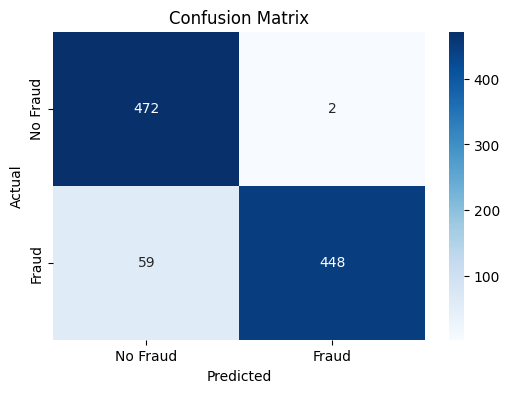

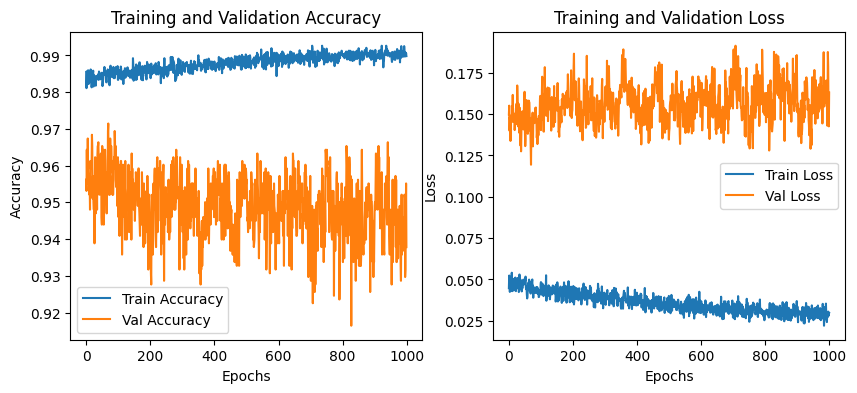

In [48]:
import time
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Function to evaluate the model
def evaluate_model(model, x_test, y_test):
    # Record the start time for inference
    start_time = time.time()
    
    # Predict the output
    y_pred_prob = model.predict(x_test)
    y_pred = np.round(y_pred_prob)
    
    # Record the end time for inference
    inference_time = time.time() - start_time
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred_prob)
    
    print(f"Inference Time: {inference_time:.4f} seconds")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"AUC-ROC: {auc_roc:.4f}")
    
    # Generate classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    
    return {
        'inference_time': inference_time,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'auc_roc': auc_roc
    }

# Function to plot training history
def plot_training_history(history):
    # Plot accuracy
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')

    plt.show()

# Evaluate the model
metrics = evaluate_model(neural_network, xtest, ytest)

# Plot training history
plot_training_history(history_combined)

# Optionally, save the metrics to a file
import json
with open('model_evaluation_metrics.json', 'w') as f:
    json.dump(metrics, f, indent=4)


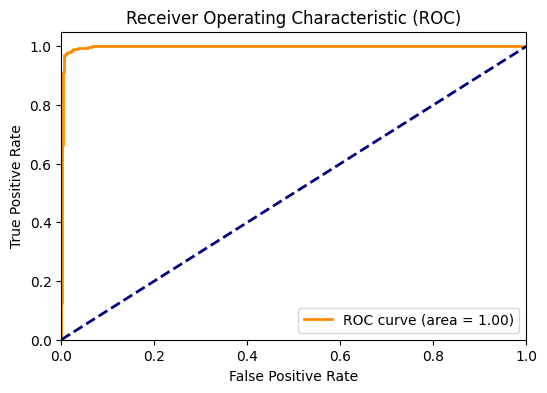

In [49]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(ytest, ytt)

# Compute AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
